In [23]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [48]:
import os
from PIL import Image
from pillow_heif import register_heif_opener
register_heif_opener()

path = 'data/'
files = [f for f in os.listdir(path) if f.endswith('.heic')]
for filename in files:
    image = Image.open(os.path.join(path, filename))
    image.save(os.path.join(path, os.path.splitext(filename)[0] + '.png'))
# image = Image.open('data/20231114_025101898_iOS.heic')
# image.save('data/20231114_025101898_iOS.png')

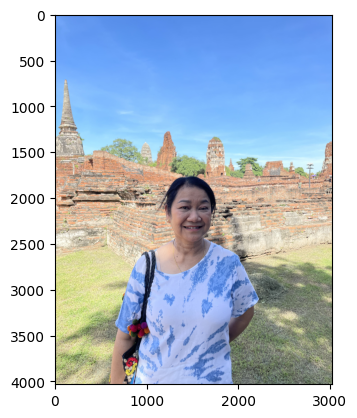

In [51]:
img_2 = Image.open('data/20231114_060538624_iOS.heic')
plt.imshow(img_2)

# First Image

(-0.5, 3023.5, 4031.5, -0.5)

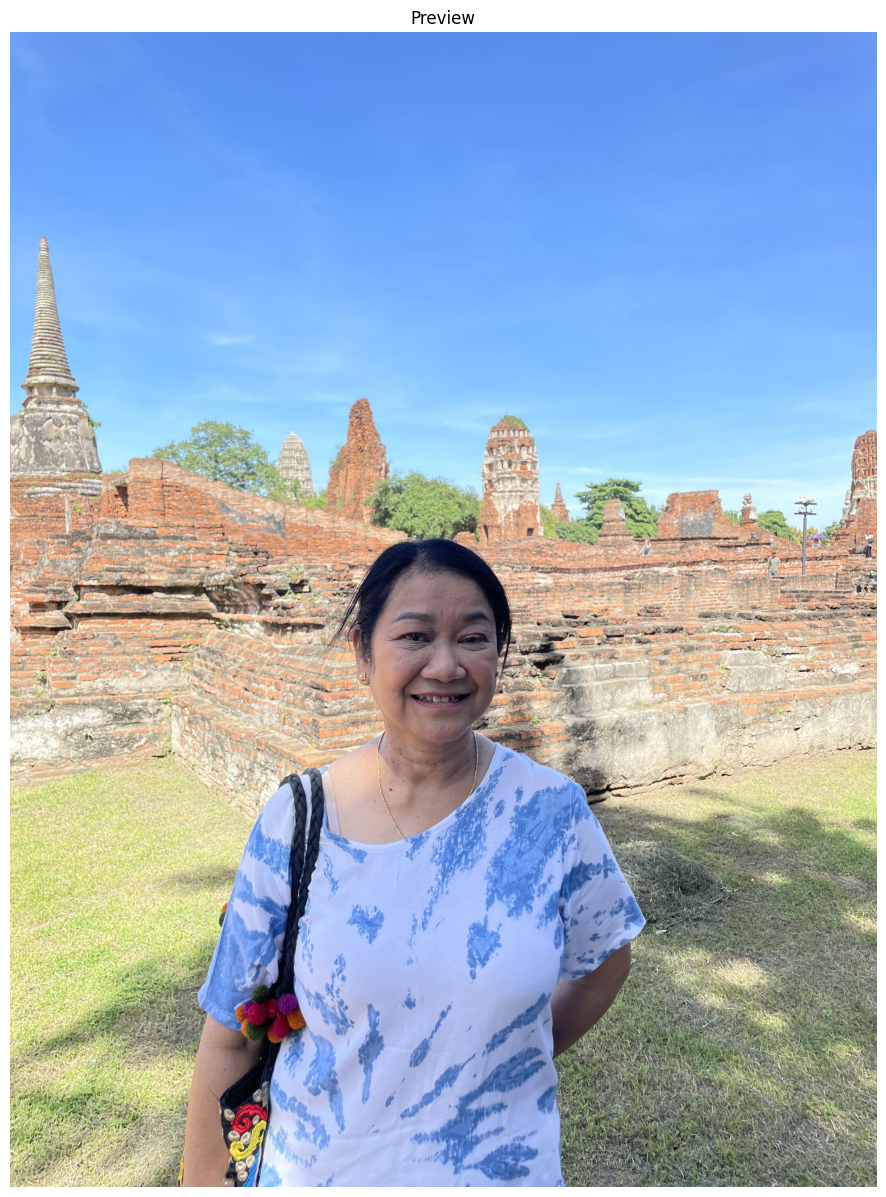

In [49]:
imagePath = 'data/20231114_060538624_iOS.jpg'
# imagePath = 'data/20231114_031315457_iOS.png'
img = cv2.imread(imagePath)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(30,15))
plt.title('Preview')
plt.imshow(rgb_img)
plt.axis('off')

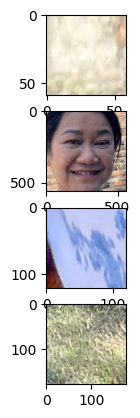

In [36]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
face_img = []
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    face_img.append(rgb_img[y:y + h, x:x + w])
    
fig,axs = plt.subplots(len(face_img))
for i in range(len(face_img)):
    axs[i].imshow(face_img[i])

(-0.5, 3023.5, 4031.5, -0.5)

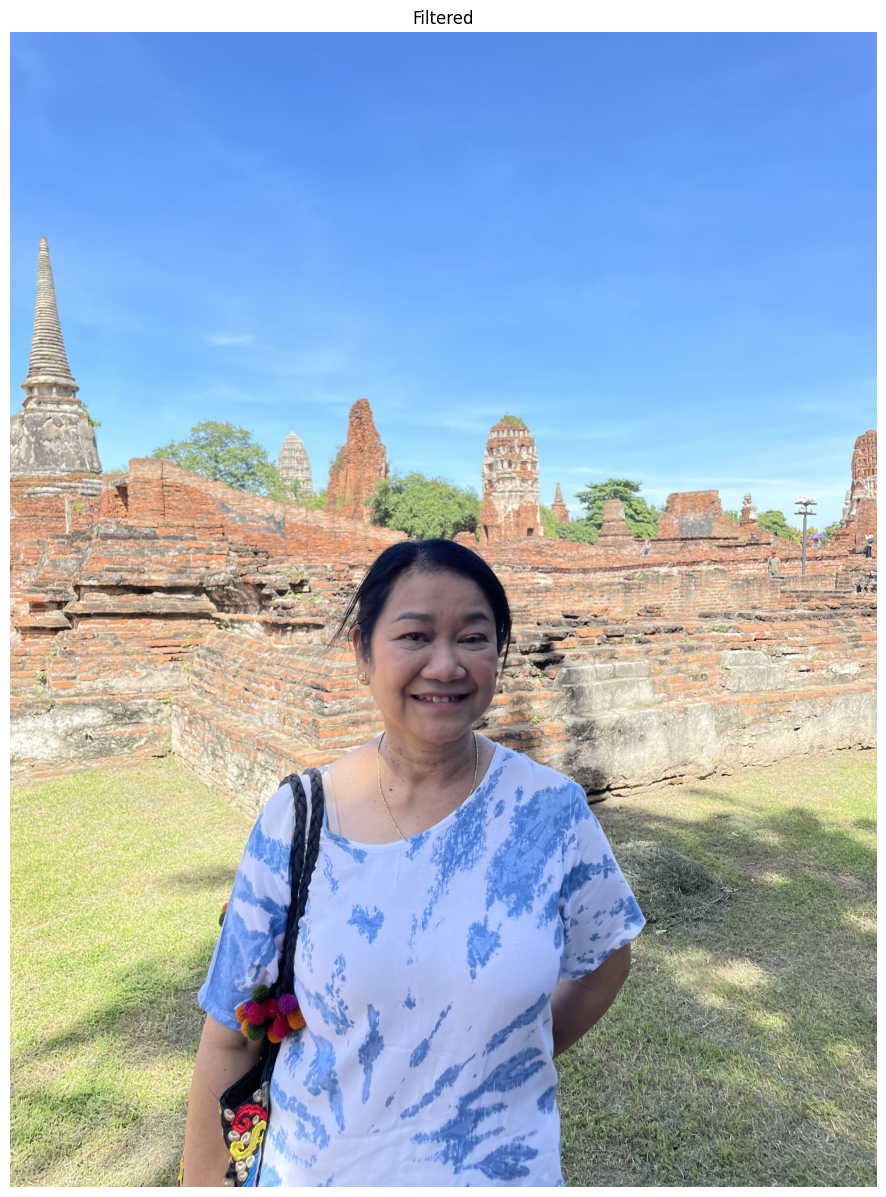

In [38]:
for i, (x, y, w, h) in enumerate(face):
    filtered_img = cv2.bilateralFilter(face_img[i], 9,75,75)
    rgb_img[y:y+h, x:x+w] = filtered_img
plt.figure(figsize=(30,15))
plt.title('Filtered')
plt.imshow(rgb_img)
plt.axis('off')

# Second im

In [39]:
path = 'data/'
filename = '20231114_060538624_filtered.png'
cv2.imwrite(os.path.join(path, filename), cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR))

True

In [41]:
imagePath = 'data/20231114_060538624_iOS.png'
img = cv2.imread(imagePath)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
face_img = []
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    face_img.append(img[y:y + h, x:x + w])
for i, (x, y, w, h) in enumerate(face):
    filtered_img = cv2.bilateralFilter(face_img[i], 9,75,75)
    img[y:y+h, x:x+w] = filtered_img

path = 'data/'
filename = '20231114_060538624_filtered_bgr.png'
cv2.imwrite(os.path.join(path, filename), img, [cv2.IMWRITE_PNG_COMPRESSION, 0])

True

In [50]:
img = cv2.imread(imagePath)
cv2.imwrite('test.jpg', img) 

True